# Homework 7
## Md. Abdullah-Al Mamun

# 1. Data Exploration
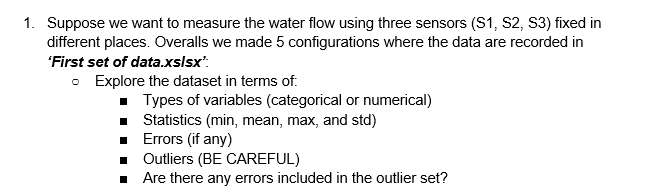



In [1]:
import pandas as pd

data = pd.read_excel('Group3.xlsx')

data

,S1,S2,S3
0,419,362,373
1,432,364,392
2,429,370,379
3,424,362,385
4,433,372,383
...,...,...,...
133,446,355,349
134,432,367,383
135,430,353,355
136,437,362,386


In [2]:
data.describe()

,S1,S2,S3
count,138.000000,138.000000,138.000000
mean,435.028986,360.217391,366.934783
std,10.252963,9.174496,25.509468
min,409.000000,315.000000,289.000000
25%,428.250000,356.250000,355.000000
50%,434.000000,362.000000,376.000000
75%,442.000000,365.000000,384.750000
max,466.000000,380.000000,400.000000


In [3]:
data.shape

(138, 3)

## Types of variables (categorical or numerical)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      138 non-null    int64
 1   S2      138 non-null    int64
 2   S3      138 non-null    int64
dtypes: int64(3)
memory usage: 3.4 KB


####  The data types of S1, S2 and S3 are int64.
####   therefore, we can conclude that these variables are numerical data.
#### And there are no missing values in  all three.

## Statistics (min, mean, max, and std)

In [5]:
Mean = data.mean()
print("Mean of our data:", Mean)

Mean of our data: S1    435.028986
S2    360.217391
S3    366.934783
dtype: float64


In [6]:
Median = data.median()
print("Median of our data:")
print(Median)

Median of our data:
S1    434.0
S2    362.0
S3    376.0
dtype: float64


In [7]:
Mode = data.mode()
print("Mode of our data:")
print(Mode)

Mode of our data:
    S1   S2   S3
0  429  362  379


### ○	Compute the spread measures


In [8]:
Range = data.max()- data.min()
print("Range of our dataset:")
print(Range)

Range of our dataset:
S1     57
S2     65
S3    111
dtype: int64


In [9]:
Variance = data.var()
print("Variance of our dataset:")
print(Variance)

Variance of our dataset:
S1    105.123241
S2     84.171374
S3    650.732942
dtype: float64


In [10]:
std = data.std()
print("Standard Deviation of our dataset:")
print(std)

Standard Deviation of our dataset:
S1    10.252963
S2     9.174496
S3    25.509468
dtype: float64


### Errors (if any)
### Outliers (BE CAREFUL)

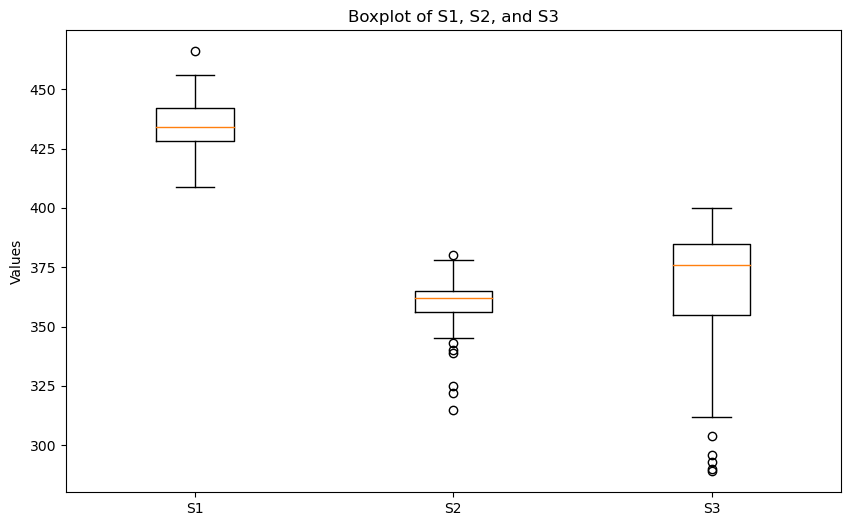

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the mean and standard deviation of each column
mean = data.mean()
std = data.std()

# Calculate the lower and upper bounds for outliers
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Find the outliers for each column
outliers = pd.DataFrame()
for column in data.columns:
    outliers[column] = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])][column]


# Find any errors in the outliers set
errors = pd.DataFrame()
for column in outliers.columns:
    errors[column] = outliers[(outliers[column] < data[column].min()) | (outliers[column] > data[column].max())][column]
    
    
# Plot the data
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data.values, showfliers=True)
plt.title('Boxplot of S1, S2, and S3')
plt.xticks([1, 2, 3], ['S1', 'S2', 'S3'])
plt.ylabel('Values')

# Add red dot to indicate any errors
for column in errors.columns:
    for value in errors[column]:
        index = data.index[data[column] == value][0]
        plt.plot(data.columns.get_loc(column) + 1, value, 'ro')

plt.show()


### Are there any errors included in the outlier set?

### There is no errors included in the outlier set. 

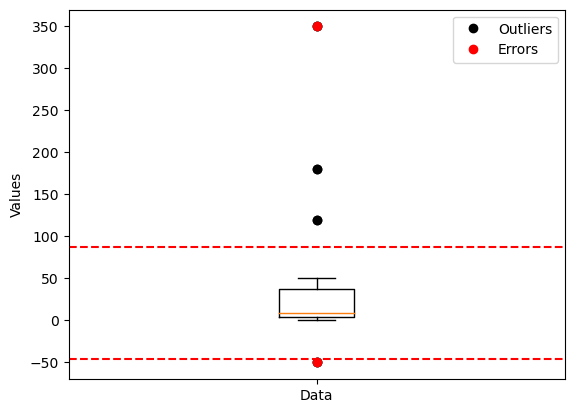

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
data = [-50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 120, 180, 350]

# Calculate outliers and errors
quartile_1, quartile_3 = np.percentile(data, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers = [x for x in data if x < lower_bound or x > upper_bound]
errors = [x for x in data if x < 1 or x > 190]

# Create plot
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Data'])

# Plot the outliers and bounds
if outliers:
    ax.plot([1] * len(outliers), outliers, 'ko', label='Outliers')
ax.plot([0.5, 1.5], [lower_bound, lower_bound], 'r--')
ax.plot([0.5, 1.5], [upper_bound, upper_bound], 'r--')

# Plot the errors if there are any
if errors:
    ax.plot([1] * len(errors), errors, 'ro', label='Errors')

ax.set_ylabel('Values')
ax.legend()
plt.show()


# Normality test korte hobe, missing values ba other type of value thakle  jemon binary

# Data Labeling

## 2. Suppose we have a twitter dataset we want to label it into two classes Radical or No-Radical the data are available in the repository Twitter Datasets.

In [13]:
import pandas as pd

# Load the data
df = pd.read_csv('Twitter Group3.csv')

df

,Unnamed: 0,tweets,labels
0,9920,criminal murderer muslim ummah righteous amp r...,NaN
1,9921,russian jet spotted west kweires airbase alepp...,NaN
2,9922,isis claims responsibility ied attack west alg...,NaN
3,9923,rt truthdig drone president rhetoric versus at...,NaN
4,9924,least rebels killed north aleppo kurdish force...,NaN
...,...,...,...
3301,13221,witness muslim phir koi lakhoo mai aik hoga,NaN
3302,13222,rt didyouknowvs coming next ahmet vs didyoukno...,NaN
3303,13223,rt conflicts map saa makes advances isis palmy...,NaN
3304,13224,undoubtedly true hypocrite afg taliban always ...,NaN
